# Funkcje

In [1]:
"""Function definitions that are used in LSB steganography."""
from matplotlib import pyplot as plt
import numpy as np
import binascii
import cv2 as cv
import math
plt.rcParams["figure.figsize"] = (18,10)


def encode_as_binary_array(msg):
    """Encode a message as a binary string."""
    msg = msg.encode("utf-8")
    msg = msg.hex()
    msg = [msg[i:i + 2] for i in range(0, len(msg), 2)]
    msg = [ "{:08b}".format(int(el, base=16)) for el in msg]
    return "".join(msg)


def decode_from_binary_array(array):
    """Decode a binary string to utf8."""
    array = [array[i:i+8] for i in range(0, len(array), 8)]
    if len(array[-1]) != 8:
        array[-1] = array[-1] + "0" * (8 - len(array[-1]))
    array = [ "{:02x}".format(int(el, 2)) for el in array]
    array = "".join(array)
    result = binascii.unhexlify(array)
    return result.decode("utf-8", errors="replace")


def load_image(path, pad=False):
    """Load an image.
    
    If pad is set then pad an image to multiple of 8 pixels.
    """
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if pad:
        y_pad = 8 - (image.shape[0] % 8)
        x_pad = 8 - (image.shape[1] % 8)
        image = np.pad(
            image, ((0, y_pad), (0, x_pad) ,(0, 0)), mode='constant')
    return image


def save_image(path, image):
    """Save an image."""
    plt.imsave(path, image) 


def clamp(n, minn, maxn):
    """Clamp the n value to be in range (minn, maxn)."""
    return max(min(maxn, n), minn)


def hide_message(image, message, nbits=1):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")
    
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)
        
    return image.reshape(shape)


def reveal_message(image, nbits=1, length=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)
    
    message = ""
    i = 0
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

# Zadania z zajęć

# Zadanie 1

In [2]:
original_image = load_image("images/rembrandt.png")  # Wczytanie obrazka
# Mnożenie stringów działa jak zwielokratnianie
message = "Zadanie pierwsze" * 1
n = 1  # liczba najmłodszych bitów używanych do ukrycia wiadomości

message = encode_as_binary_array(message)  # Zakodowanie wiadomości jako ciąg 0 i 1
image_with_message = hide_message(original_image, message, n)  # Ukrycie wiadomości w obrazku

save_image("images/image_with_message.png", image_with_message)  # Zapisanie obrazka w formacie PNG
image_with_message_png = load_image("images/image_with_message.png")  # Wczytanie obrazka PNG

secret_message_png = decode_from_binary_array(
    reveal_message(image_with_message_png, nbits=n, length=len(message)))  # Odczytanie ukrytej wiadomości z PNG

print(secret_message_png)

Zadanie pierwsze


# Zadanie 2

Non neque etincidunt magnam consectetur aliquam. Voluptatem velit magnam ipsum labore. Ipsum neque etincidunt ipsum velit magnam. Quiquia quiquia ut numquam porro. Numquam quaerat sed eius quisquam eius aliquam aliquam. Dolor porro non consectetur. Labore magnam velit dolorem eius. Modi quaerat non labore quaerat sit eius dolorem. Ipsum quiquia numquam neque est quaerat eius.

Sed voluptatem quiquia etincidunt. Labore sed adipisci porro. Tempora ut eius voluptatem modi ut eius. Numquam neque velit ipsum non quiquia dolore amet. Quisquam dolore dolor est amet ut modi consectetur. Sed quiquia modi numquam consectetur. Dolorem est voluptatem ut consectetur non non. Quiquia aliquam labore dolorem modi dolor dolore.

Sed quisquam porro sit amet sed dolor sed. Numquam numquam modi labore quisquam. Velit ipsum est sit neque eius voluptatem porro. Non porro neque dolor. Aliquam est tempora neque numquam neque.

Numquam dolore magnam non. Voluptatem est magnam eius aliquam dolor. Ut non neque s

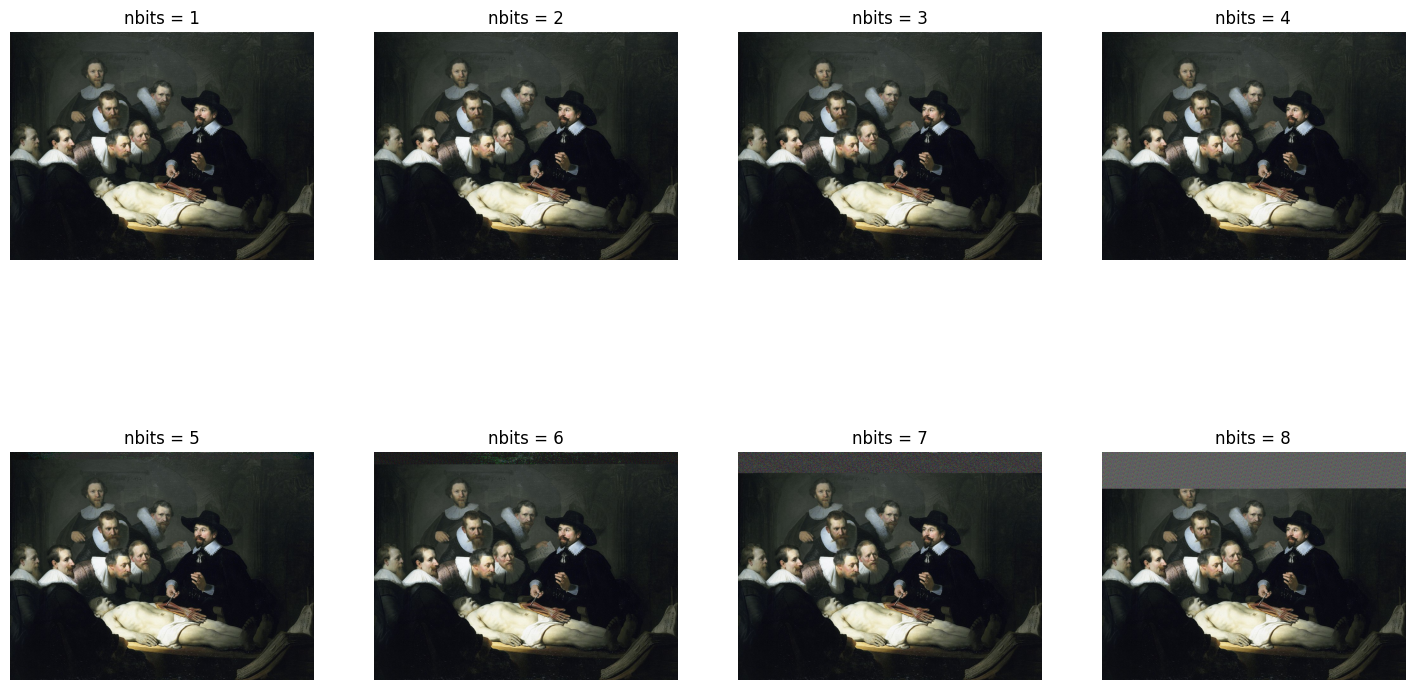

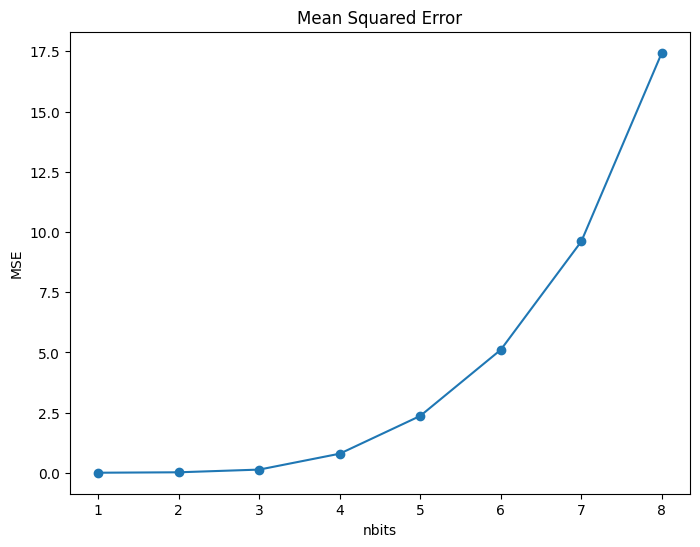

In [16]:
from lorem import text

# Wygenerowanie przykładowego tekstu
lorem_text = text()

# Wczytanie obrazka
original_image = load_image("images/rembrandt.png")

# Lista na wyniki MSE
mse_list = []

# Generowanie obrazków z ukrytą wiadomością
for n in range(1, 9):
    # Kodowanie wiadomości
    message = encode_as_binary_array(lorem_text) * (1 << n)

    # Ukrycie wiadomości w obrazku
    image_with_message = hide_message(original_image, message, n)

    # Obliczenie MSE
    mse = np.mean((original_image - image_with_message) ** 2)
    mse_list.append(mse)

    # Wyświetlenie obrazka
    plt.subplot(2, 4, n)
    plt.title(f"nbits = {n}")
    plt.imshow(image_with_message)
    plt.axis("off")

# Wyświetlenie wykresu MSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), mse_list, "-o")
plt.xlabel("nbits")
plt.ylabel("MSE")
plt.title("Mean Squared Error")
plt.show()

# Zadanie 3

In [ ]:
#
# tu umieść kod
#

# Zadanie 4

In [ ]:
#
# tu umieść kod
#

# Zadanie 5

In [ ]:
#
# tu umieść kod
#